In [ ]:
# 1.FINAL CASE - Aylin ÖZKAN KELEŞ
# Seçilen dataset: Airline Passenger Satisfaction Dataset
# Datasetin seçilme amaçları: Gerçek veri olması, aykırı ve eksik değerlerin bulunması, ilgimi çeken bir konu olması.

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [130]:
# Dataseti içeri almak için:

from google.colab import files

uploaded = files.upload()

Saving airline_passenger_satisfaction.csv to airline_passenger_satisfaction (3).csv


In [131]:
airline_passenger=pd.read_csv("airline_passenger_satisfaction.csv")

In [ ]:
# Datasetin ilk 5 satırını getirerek, kolonları görüntüleyip, veriyi tanımaya başlıyorum.

airline_passenger.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Datasetin satır ve sütun sayısı:

airline_passenger.shape

(103904, 25)

In [ ]:
# Kolon adları ve tipleri için:

airline_passenger.dtypes

,0
Unnamed: 0,int64
id,int64
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64


In [ ]:
# Dataset hakkında genel bilgi için:

airline_passenger.info() #"Arrival Delay in Minutes" kolonunda eksik veri tespit ettim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
# Toplam kadın ve erkek yolcuların sayısı:

number_of_female=len(airline_passenger[airline_passenger["Gender"]=="Female"])
number_of_male=len(airline_passenger[airline_passenger["Gender"]=="Male"])

print("Toplam kadın sayısı: ", number_of_female)
print("Toplam erkek sayısı: ", number_of_male)

# Kadın ve erkek sayıları birbirine yakın.

Toplam kadın sayısı:  52727
Toplam erkek sayısı:  51177


In [ ]:
# Toplam, kadın ve erkek yaş ortalaması:

mean_of_total=airline_passenger["Age"].mean()
mean_of_female=airline_passenger[airline_passenger["Gender"]=="Female"]["Age"].mean()
mean_of_male=airline_passenger[airline_passenger["Gender"]=="Male"]["Age"].mean()

print("Toplam yaş ortalaması: ", mean_of_total)
print("Kadınların yaş ortalamas: ", mean_of_female)
print("Erkeklerin yaş ortalaması: ", mean_of_male)

# Kadın ve erkek yaş ortalaması birbirine oldukça yakın.

Toplam yaş ortalaması:  39.379706267323684
Kadınların yaş ortalamas:  39.2467616211808
Erkeklerin yaş ortalaması:  39.516677413681926


In [ ]:
# En uzak mesafeden uçuş yapan kişi ile en kısa mesafeden uçuş yapan kişinin mesafe uzaklığı:

max_flight_distance=airline_passenger["Flight Distance"].max()
min_flight_distance=airline_passenger["Flight Distance"].min()

print("En uzak uçuşun mesafe uzaklığı: ", max_flight_distance)
print("En kısa uçuşun mesafe uzaklığı: ", min_flight_distance)

En uzak uçuşun mesafe uzaklığı:  4983
En kısa uçuşun mesafe uzaklığı:  31


In [ ]:
# Memnun olan ve nötr/memnun olmayan toplam kişi/kadın/erkek sayısı:

number_of_satisfied=len(airline_passenger[airline_passenger["satisfaction"]=="satisfied"])
number_of_dissatisfied=len(airline_passenger[airline_passenger["satisfaction"]=="neutral or dissatisfied"])
number_of_satisfied_female=len(airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Female")])
number_of_dissatisfied_female=len(airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Female")])
number_of_satisfied_male=len(airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Male")])
number_of_dissatisfied_male=len(airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Male")])

print("Memnun olan toplam kişi sayısı: ", number_of_satisfied)
print("Nötr ya da memnun olmayan toplam kişi sayısı: ", number_of_dissatisfied)
print("Memnun olan kadın sayısı: ", number_of_satisfied_female)
print("Nötr ya da memnun olmayan kadın sayısı: ", number_of_dissatisfied_female)
print("Memnun olan erkek sayısı: ", number_of_satisfied_male)
print("Nötr ya da memnun olmayan erkek sayısı: ", number_of_dissatisfied_male)

# Memnun olmayanların sayısı hem kadınlarda, hem erkeklerde, hem de toplamda memnun olanlardan fazladır.

Memnun olan toplam kişi sayısı:  45025
Nötr ya da memnun olmayan toplam kişi sayısı:  58879
Memnun olan kadın sayısı:  22534
Nötr ya da memnun olmayan kadın sayısı:  30193
Memnun olan erkek sayısı:  22491
Nötr ya da memnun olmayan erkek sayısı:  28686


In [ ]:
# Memnun olan ve nötr/memnun olmayan toplam kişi/kadın/erkeklerin YAŞ ortalaması / medyanı/ minimum değeri / maksimum değeri / standart sapması:
# Not: Tablolu hali aşağıda verilmiştir.

mean_of_age_satisfied=airline_passenger[airline_passenger["satisfaction"]=="satisfied"]["Age"].mean()
mean_of_age_dissatisfied=airline_passenger[airline_passenger["satisfaction"]=="neutral or dissatisfied"]["Age"].mean()
mean_of_age_satisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Female")]["Age"].mean()
mean_of_age_dissatisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Female")]["Age"].mean()
mean_of_age_satisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Male")]["Age"].mean()
mean_of_age_dissatisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Male")]["Age"].mean()

median_of_age_satisfied=airline_passenger[airline_passenger["satisfaction"]=="satisfied"]["Age"].median()
median_of_age_dissatisfied=airline_passenger[airline_passenger["satisfaction"]=="neutral or dissatisfied"]["Age"].median()
median_of_age_satisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Female")]["Age"].median()
median_of_age_dissatisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Female")]["Age"].median()
median_of_age_satisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Male")]["Age"].median()
median_of_age_dissatisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Male")]["Age"].median()

min_of_age_satisfied=airline_passenger[airline_passenger["satisfaction"]=="satisfied"]["Age"].min()
min_of_age_dissatisfied=airline_passenger[airline_passenger["satisfaction"]=="neutral or dissatisfied"]["Age"].min()
min_of_age_satisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Female")]["Age"].min()
min_of_age_dissatisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Female")]["Age"].min()
min_of_age_satisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Male")]["Age"].min()
min_of_age_dissatisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Male")]["Age"].min()

max_of_age_satisfied=airline_passenger[airline_passenger["satisfaction"]=="satisfied"]["Age"].max()
max_of_age_dissatisfied=airline_passenger[airline_passenger["satisfaction"]=="neutral or dissatisfied"]["Age"].max()
max_of_age_satisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Female")]["Age"].max()
max_of_age_dissatisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Female")]["Age"].max()
max_of_age_satisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Male")]["Age"].max()
max_of_age_dissatisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Male")]["Age"].max()

std_of_age_satisfied=airline_passenger[airline_passenger["satisfaction"]=="satisfied"]["Age"].std()
std_of_age_dissatisfied=airline_passenger[airline_passenger["satisfaction"]=="neutral or dissatisfied"]["Age"].std()
std_of_age_satisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Female")]["Age"].std()
std_of_age_dissatisfied_female=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Female")]["Age"].std()
std_of_age_satisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="satisfied") & (airline_passenger["Gender"]=="Male")]["Age"].std()
std_of_age_dissatisfied_male=airline_passenger[(airline_passenger["satisfaction"]=="neutral or dissatisfied") & (airline_passenger["Gender"]=="Male")]["Age"].std()


print("Yaş Ortalaması")
print("Memnun olan kişilerin yaş ortalaması: ", mean_of_age_satisfied)
print("Nötr ya da memnun olmayan kişilerin yaş ortalaması: ", mean_of_age_dissatisfied)
print("Memnun olan kadınların yaş ortalaması: ", mean_of_age_satisfied_female)
print("Nötr ya da memnun olmayan kadınların yaş ortalaması: ", mean_of_age_dissatisfied_female)
print("Memnun olan erkeklerin yaş ortalaması: ", mean_of_age_satisfied_male)
print("Nötr ya da memnun olmayan erkeklerin yaş ortalaması: ", mean_of_age_dissatisfied_male)

print("")
print("Yaş Medyanı")
print("Memnun olan kişilerin yaş medyanı: ", median_of_age_satisfied)
print("Nötr ya da memnun olmayan kişilerin yaş medyanı: ", median_of_age_dissatisfied)
print("Memnun olan kadınların yaş medyanı: ", median_of_age_satisfied_female)
print("Nötr ya da memnun olmayan kadınların yaş medyanı: ", median_of_age_dissatisfied_female)
print("Memnun olan erkeklerin yaş medyanı: ", median_of_age_satisfied_male)
print("Nötr ya da memnun olmayan erkeklerin yaş medyanı: ", median_of_age_dissatisfied_male)

print("")
print("Yaş Minimum Değeri")
print("Memnun olan kişilerin yaş minimum değeri: ", min_of_age_satisfied)
print("Nötr ya da memnun olmayan kişilerin yaş minimum değeri: ", min_of_age_dissatisfied)
print("Memnun olan kadınların yaş minimum değeri: ", min_of_age_satisfied_female)
print("Nötr ya da memnun olmayan kadınların yaş minimum değeri: ", min_of_age_dissatisfied_female)
print("Memnun olan erkeklerin yaş minimum değeri: ", min_of_age_satisfied_male)
print("Nötr ya da memnun olmayan erkeklerin yaş minimum değeri: ", min_of_age_dissatisfied_male)

print("")
print("Yaş Maksimum Değeri")
print("Memnun olan kişilerin yaş maksimum değeri: ", max_of_age_satisfied)
print("Nötr ya da memnun olmayan kişilerin yaş maksimum değeri: ", max_of_age_dissatisfied)
print("Memnun olan kadınların yaş maksimum değeri: ", max_of_age_satisfied_female)
print("Nötr ya da memnun olmayan kadınların yaş maksimum değeri: ", max_of_age_dissatisfied_female)
print("Memnun olan erkeklerin yaş maksimum değeri: ", max_of_age_satisfied_male)
print("Nötr ya da memnun olmayan erkeklerin yaş maksimum değeri: ", max_of_age_dissatisfied_male)

print("")
print("Yaş Standart Sapması")
print("Memnun olan kişilerin yaş standart sapması: ", std_of_age_satisfied)
print("Nötr ya da memnun olmayan kişilerin yaş standart sapması: ", std_of_age_dissatisfied)
print("Memnun olan kadınların yaş mstandart sapması: ", std_of_age_satisfied_female)
print("Nötr ya da memnun olmayan kadınların yaş mstandart sapması: ", std_of_age_dissatisfied_female)
print("Memnun olan erkeklerin yaşstandart sapması: ", std_of_age_satisfied_male)
print("Nötr ya da memnun olmayan erkeklerin yaş standart sapması: ", std_of_age_dissatisfied_male)


Yaş Ortalaması
Memnun olan kişilerin yaş ortalaması:  41.750583009439204
Nötr ya da memnun olmayan kişilerin yaş ortalaması:  37.56668761358039
Memnun olan kadınların yaş ortalaması:  41.72091062394604
Nötr ya da memnun olmayan kadınların yaş ortalaması:  37.40022521776571
Memnun olan erkeklerin yaş ortalaması:  41.78031212484994
Nötr ya da memnun olmayan erkeklerin yaş ortalaması:  37.741895001045805

Yaş Medyanı
Memnun olan kişilerin yaş medyanı:  43.0
Nötr ya da memnun olmayan kişilerin yaş medyanı:  36.0
Memnun olan kadınların yaş medyanı:  43.0
Nötr ya da memnun olmayan kadınların yaş medyanı:  36.0
Memnun olan erkeklerin yaş medyanı:  43.0
Nötr ya da memnun olmayan erkeklerin yaş medyanı:  37.0

Yaş Minimum Değeri
Memnun olan kişilerin yaş minimum değeri:  7
Nötr ya da memnun olmayan kişilerin yaş minimum değeri:  7
Memnun olan kadınların yaş minimum değeri:  7
Nötr ya da memnun olmayan kadınların yaş minimum değeri:  7
Memnun olan erkeklerin yaş minimum değeri:  7
Nötr ya da mem

In [ ]:
# Memnun olan ve nötr/memnun olmayan kişilerin YAŞ ortalaması / medyanı/ minimum değeri / maksimum değeri / standart sapması (tablolu):


airline_passenger.groupby(["satisfaction"], as_index=False).agg(Mean_of_age=("Age","mean"), Median_of_age=("Age","median"),
                                                                Min_of_age=("Age","min"), Max_of_age=("Age","max"),Std_of_age=("Age","std"))

#Satisfaction grubu içinde, görünümü bozmadan (as_index=False eklenmesi ile) yapıldı.
#Aggregate işlemi ile gruptaki bilgiler özetlenerek birleştirilmiştir.

,satisfaction,Mean_of_age,Median_of_age,Min_of_age,Max_of_age,Std_of_age
0,neutral or dissatisfied,37.566688,36.0,7,85,16.459825
1,satisfied,41.750583,43.0,7,85,12.767833


In [ ]:
# Memnun olan ve nötr/memnun olmayan kadın ve erkeklerin YAŞ ortalaması / medyanı/ minimum değeri / maksimum değeri / standart sapması (tablolu):


airline_passenger.groupby(["satisfaction", "Gender"], as_index=False).agg(Mean_of_age=("Age","mean"), Median_of_age=("Age","median"),
                                                                          Min_of_age=("Age","min"), Max_of_age=("Age","max"),Std_of_age=("Age","std"))

#Satisfaction ve Gender grubu içinde, görünümü bozmadan (as_index=False eklenmesi ile) yapıldı.
#Aggregate işlemi ile gruptaki bilgiler özetlenerek birleştirilmiştir.

,satisfaction,Gender,Mean_of_age,Median_of_age,Min_of_age,Max_of_age,Std_of_age
0,neutral or dissatisfied,Female,37.400225,36.0,7,85,16.446213
1,neutral or dissatisfied,Male,37.741895,37.0,7,85,16.472610
2,satisfied,Female,41.720911,43.0,7,85,12.805701
3,satisfied,Male,41.780312,43.0,7,85,12.729996


In [ ]:
# Memnun olan ve olmayan yolcuların kalkış gecikmesi ortalamaları (dakika cinsinden):

airline_passenger.groupby("satisfaction", as_index=False)["Departure Delay in Minutes"].mean()

#Aggregate olmadan tek işlemi tablo şeklinde görüntüleyebiliriz.
#Satisfaction grubu içinde, görünümü bozmadan (as_index=False eklenmesi ile) yapıldı.
#Memnun olmayan yolcuların kalkış gecikme ortalaması daha fazla olduğundan rötarların memnuniyeti etkilediği anlaşılmaktadır.
#"Departure Delay in Minutes" KOLONUNDA 14529 ADET AYKIRI DEĞER BULUNMAKTADIR VE O ŞEKİLDE HESAPLANMIŞTIR. AYKIRI VERİ YAKLAŞIK ½14 CİVARINDADIR. (Aşağıda tespit edilmiştir.)

,satisfaction,Departure Delay in Minutes
0,neutral or dissatisfied,16.503728
1,satisfied,12.608084


In [ ]:
# Memnun olan ve olmayan yolcuların kalkış gecikmesi minimum değerleri (dakika cinsinden):

airline_passenger.groupby("satisfaction", as_index=False)["Departure Delay in Minutes"].min() #Satisfaction grubu içinde, görünümü bozmadan (as_index=False eklenmesi ile) yapıldı.


,satisfaction,Departure Delay in Minutes
0,neutral or dissatisfied,0
1,satisfied,0


In [ ]:
# Memnun olan ve olmayan yolcuların kalkış gecikmesi maksimum değerleri (dakika cinsinden):

airline_passenger.groupby("satisfaction", as_index=False)["Departure Delay in Minutes"].max() #Satisfaction grubu içinde, görünümü bozmadan (as_index=False eklenmesi ile) yapıldı.

,satisfaction,Departure Delay in Minutes
0,neutral or dissatisfied,1592
1,satisfied,1305


In [ ]:
# Her kategori için 3'ün altında puan veren kişi sayıları:

number_of_inflight_wifi_service=len(airline_passenger[airline_passenger["Inflight wifi service"]<3])
number_of_departure_arrival_time=len(airline_passenger[airline_passenger["Departure/Arrival time convenient"]<3])
number_of_ease_of_online_booking=len(airline_passenger[airline_passenger["Ease of Online booking"]<3])
number_of_gate_location=len(airline_passenger[airline_passenger["Gate location"]<3])
number_of_food_drink=len(airline_passenger[airline_passenger["Food and drink"]<3])
number_of_online_boarding=len(airline_passenger[airline_passenger["Online boarding"]<3])
number_of_seat_comfort=len(airline_passenger[airline_passenger["Seat comfort"]<3])
number_of_inflight_entertainment=len(airline_passenger[airline_passenger["Inflight entertainment"]<3])
number_of_onboard_service=len(airline_passenger[airline_passenger["On-board service"]<3])
number_of_leg_room_service=len(airline_passenger[airline_passenger["Leg room service"]<3])
number_of_baggage_handling=len(airline_passenger[airline_passenger["Baggage handling"]<3])
number_of_checkin_service=len(airline_passenger[airline_passenger["Checkin service"]<3])
number_of_inflight_service=len(airline_passenger[airline_passenger["Inflight service"]<3])
number_of_cleanliness=len(airline_passenger[airline_passenger["Cleanliness"]<3])




print("Her kategori için 5 Üzerinden 3'ün Altında Puan Veren Kişi Sayıları (103904 kişi arasından)")
print("Not: Değer ne kadar yüksekse o kadar olumsuzdur.")
print("")
print("Uçak içi wifi servisi: ", number_of_inflight_wifi_service)
print("Kalkış/varış zamanı uygunluğu: ", number_of_departure_arrival_time)
print("Çevrimiçi rezervasyon kolaylığı: ", number_of_ease_of_online_booking)
print("Kapı konumu: ", number_of_gate_location)
print("Yiyecek ve içecek: ", number_of_food_drink)
print("Çevrimiçi biniş: ", number_of_online_boarding)
print("Koltuk konforu: ", number_of_seat_comfort)
print("Uçuş içi eğlence: ", number_of_inflight_entertainment)
print("Uçak içi hizmet: ", number_of_onboard_service)
print("Diz mesafesi hizmeti: ", number_of_leg_room_service)
print("Bagaj işlemleri: ", number_of_baggage_handling)
print("Check-in hizmeti: ", number_of_checkin_service)
print("Uçak içi hizmet: ", number_of_inflight_service)
print("Temizlik: ", number_of_cleanliness)

#Uçak içi wifi servisi, Kalkış/varış zamanı uygunluğu, Çevrimiçi rezervasyon kolaylığı, Kapı konumu en düşük puan alan kategorilerdir.

Her kategori için 5 Üzerinden 3'ün Altında Puan Veren Kişi Sayıları (103904 kişi arasından)
Not: Değer ne kadar yüksekse o kadar olumsuzdur.

Uçak içi wifi servisi:  46773
Kalkış/varış zamanı uygunluğu:  37989
Çevrimiçi rezervasyon kolaylığı:  46033
Kapı konumu:  37022
Yiyecek ve içecek:  34932
Çevrimiçi biniş:  30625
Koltuk konforu:  26973
Uçuş içi eğlence:  30129
Uçak içi hizmet:  26556
Diz mesafesi hizmeti:  30350
Bagaj işlemleri:  18758
Check-in hizmeti:  25784
Uçak içi hizmet:  18544
Temizlik:  29462


In [ ]:
# Eksik verinin sağlaması için:

airline_passenger.isnull().sum()

#Arrival Delay in Minutes kolonunda 310 adet eksik veri var.

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
# Eksik veri için 3 farklı yöntem izlenebilir:
# 1. Eksik verilerin temizlenmesi: Eksik veri satırları temizlendiğinde diğer verilerin analizi için yanıltıcı sonuçlar doğurabilir. Keskin bir yöntemdir.
# 2. Eksik verilerin doldurulması: Eksik veriler ortama değerler ile doldurulabilir, fakat bu durum verinin gerçekliğini etkiler.
# 3. Eksik verinin olduğunun belirtilmesi: Eksik veri ile işlem yapılıp işlemin yanına verilerin eksik olduğu ile ilgili yorum açılabilir. Bu yöntem en sağlıklı yöntemdir.
# Bu çalışmada 3. yöntem uygulanacaktır. Hiçbir veriye müdahale edilmeyecektir.

In [ ]:
# Memnun olan ve olmayan yolcuların varış gecikmesi ortalaması, minimum ve maksimum değeri (Dakika cinsinden):

airline_passenger.groupby(["satisfaction"], as_index=False).agg(Mean_of_arrival_delay=("Arrival Delay in Minutes","mean"),
                                                                Min_of_arrival_delay=("Arrival Delay in Minutes","min"), Max_of_arrival_delay=("Arrival Delay in Minutes","max"))

# "Arrival Delay in Minutes" KOLONUNDA 310 KİŞİNİN VERİSİ EKSİKTİR VE O ŞEKİLDE HESAPLANMIŞTIR. YANİ VERİNİN YAKLAŞIK %0,3'Ü EKSİKTİR.
# "Arrival Delay in Minutes" KOLONUNDA 13954 ADET AYKIRI DEĞER BULUNMAKTADIR VE O ŞEKİLDE HESAPLANMIŞTIR. AYKIRI VERİ YAKLAŞIK ½13,5 CİVARINDADIR. (Aşağıda tespit edilmiştir.)

,satisfaction,Mean_of_arrival_delay,Min_of_arrival_delay,Max_of_arrival_delay
0,neutral or dissatisfied,17.127536,0.0,1584.0
1,satisfied,12.630799,0.0,1280.0


In [ ]:
# "Age" kolonu için aykırı değer olup olmadığına bakalım.

Q1_age=airline_passenger["Age"].quantile(0.25)
Q3_age=airline_passenger["Age"].quantile(0.75)
IQR_age=Q3_age - Q1_age

# Aykırı değerlerin sınırları:
lower_limit_age=Q1_age - 1.5*IQR_age
upper_limit_age=Q3_age + 1.5*IQR_age

# Aykırı değerlerin filtrelenmesi:
outlier_age=airline_passenger[(airline_passenger["Age"]<lower_limit_age) | (airline_passenger["Age"]>upper_limit_age)]

print(outlier_age)

#Aykırı değer yok.

Empty DataFrame
Columns: [Unnamed: 0, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 25 columns]


In [ ]:
# "Flight Distance" kolonu için aykırı değer olup olmadığına bakalım.

Q1_flight_distance=airline_passenger["Flight Distance"].quantile(0.25)
Q3_flight_distance=airline_passenger["Flight Distance"].quantile(0.75)
IQR_flight_distance=Q3__flight_distance - Q1_flight_distance

# Aykırı değerlerin sınırları:
lower_limit_flight_distance=Q1_flight_distance - 1.5*IQR_flight_distance
upper_limit_flight_distance=Q3_flight_distance + 1.5*IQR_flight_distance

# Aykırı değerlerin filtrelenmesi:
outlier_flight_distance=airline_passenger[(airline_passenger["Flight Distance"]<lower_limit_flight_distance) | (airline_passenger["Flight Distance"]>upper_limit_flight_distance)]

print(outlier_flight_distance.shape[0])

# 2291 adet aykırı değer tespit edildi.

2291


In [ ]:
# "Flight Distance" kolonu için aykırı değerleri tablo görünümünde her aykırı değer grubunun kaç satır içerdiği bilgisi için:

outlier_flight_distance.groupby("Flight Distance", as_index=False).size()

,Flight Distance,size
0,3737,8
1,3738,6
2,3739,6
3,3740,11
4,3741,4
...,...,...
264,4243,18
265,4502,10
266,4817,5
267,4963,13


In [ ]:
# "Departure Delay in Minutes" kolonu için aykırı değer olup olmadığına bakalım.

Q1_departure_delay=airline_passenger["Departure Delay in Minutes"].quantile(0.25)
Q3_departure_delay=airline_passenger["Departure Delay in Minutes"].quantile(0.75)
IQR_departure_delay=Q3_departure_delay - Q1_departure_delay

# Aykırı değerlerin sınırları:
lower_limit_departure_delay=Q1_departure_delay - 1.5*IQR_departure_delay
upper_limit_departure_delay=Q3_departure_delay + 1.5*IQR_departure_delay

# Aykırı değerlerin filtrelenmesi:
outlier_departure_delay=airline_passenger[(airline_passenger["Departure Delay in Minutes"]<lower_limit_departure_delay) | (airline_passenger["Departure Delay in Minutes"]>upper_limit_departure_delay)]

print(outlier_departure_delay.shape[0])

# 14529 adet aykırı değer tespit edildi.

14529


In [ ]:
# "Departure Delay in Minutes" kolonu için aykırı değerleri tablo görünümünde her aykırı değer grubunun kaç satır içerdiği bilgisi için:

outlier_departure_delay.groupby("Departure Delay in Minutes", as_index=False).size()

,Departure Delay in Minutes,size
0,31,426
1,32,356
2,33,341
3,34,333
4,35,330
...,...,...
410,933,1
411,978,1
412,1017,1
413,1305,1


In [ ]:
# "Arrival Delay in Minutes" kolonu için aykırı değer olup olmadığına bakalım.

Q1_arrival_delay=airline_passenger["Arrival Delay in Minutes"].quantile(0.25)
Q3_arrival_delay=airline_passenger["Arrival Delay in Minutes"].quantile(0.75)
IQR_arrival_delay=Q3_arrival_delay - Q1_arrival_delay

# Aykırı değerlerin sınırları:
lower_limit_arrival_delay=Q1_arrival_delay - 1.5*IQR_arrival_delay
upper_limit_arrival_delay=Q3_arrival_delay + 1.5*IQR_arrival_delay

# Aykırı değerlerin filtrelenmesi:
outlier_arrival_delay=airline_passenger[(airline_passenger["Arrival Delay in Minutes"]<lower_limit_arrival_delay) | (airline_passenger["Arrival Delay in Minutes"]>upper_limit_arrival_delay)]

print(outlier_arrival_delay.shape[0])

# 13954 adet aykırı değer tespit edildi.

13954


In [ ]:
# "Arrival Delay in Minutes" kolonu için aykırı değerleri tablo görünümünde her aykırı değer grubunun kaç satır içerdiği bilgisi için:

outlier_arrival_delay.groupby("Arrival Delay in Minutes", as_index=False).size()

,Arrival Delay in Minutes,size
0,33.0,366
1,34.0,356
2,35.0,316
3,36.0,362
4,37.0,307
...,...,...
417,952.0,1
418,970.0,1
419,1011.0,1
420,1280.0,1


satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64


/tmp/ipython-input-81-2110228915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="satisfaction", kind="count", data=airline_passenger, palette="Set2")


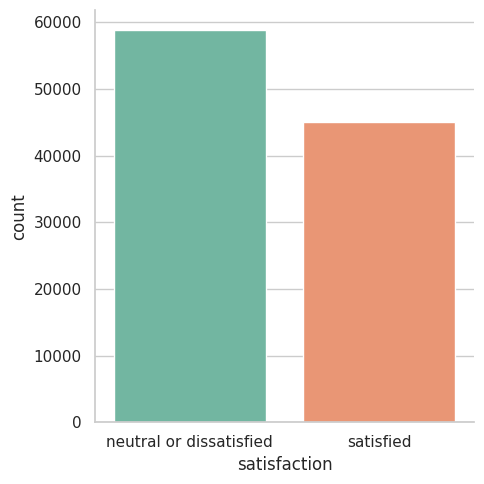

In [ ]:
# Görselleştirmelere giriş yapmak için memnuniyet durumunu görselleştirelim.

print(airline_passenger["satisfaction"].value_counts(normalize=True))
sns.catplot(x="satisfaction", kind="count", data=airline_passenger, palette="Set2")

# Daha önce de tespit edildiği gibi memnun olmayan yolcuların sayısı, memnun olanlardan fazladır.

/tmp/ipython-input-80-984301888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Class", kind="count", data=airline_passenger,palette="Set2")


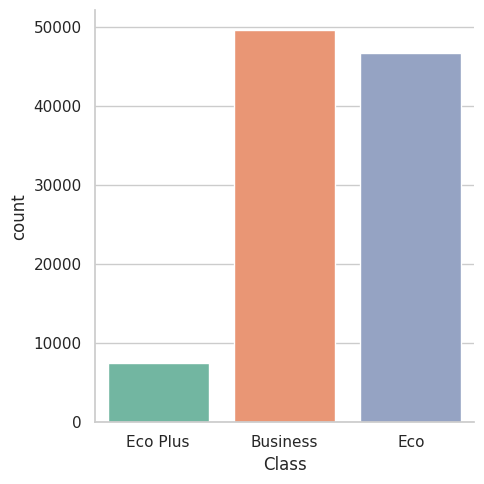

In [ ]:
# Sınıfların nasıl sayısal dağılımına bakalım.

sns.catplot(x="Class", kind="count", data=airline_passenger,palette="Set2")

# Toplam ekonomi sınıfı ve business arasında dengeli bir dağılım olduğu söylenebilir.

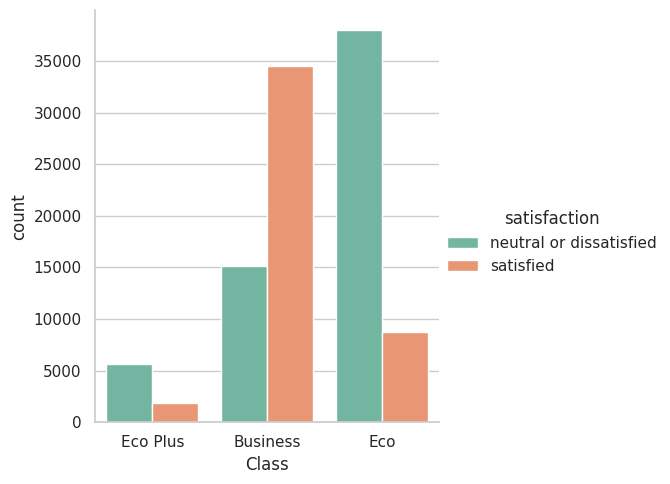

In [ ]:
# Sınıflara göre memuniyet durumuna bakalım.

sns.catplot(x="Class", kind="count", hue="satisfaction", data=airline_passenger, palette="Set2")

# Bu tabloya göre Eco Plus ve Eco'da olan yolcuların çoğunluğu memnun değilken, Business Class'taki yolcular çoğunlukla memnun.

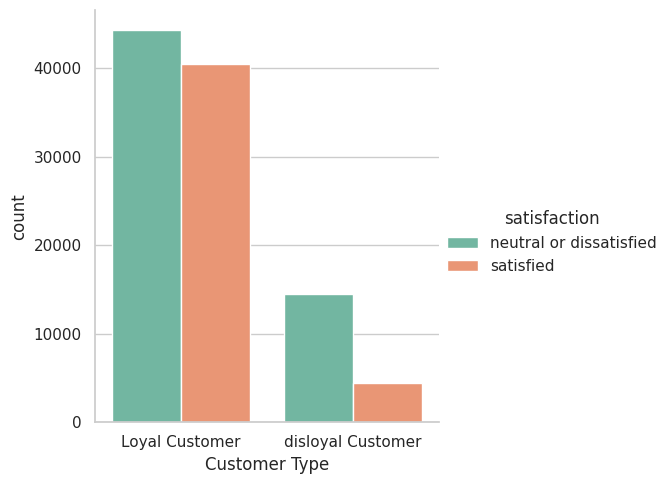

In [ ]:
# Yolcu türüne göre memuniyet durumuna bakalım.

sns.catplot(x="Customer Type", kind="count", hue="satisfaction", data=airline_passenger, palette="Set2")

# Bu tabloya göre sadakatli müşteriler arasında memnuniyet konusunda dengeli bir dağılım varken, sadakatli olmayanlar arasında memnuniyetsizlik fazladır.

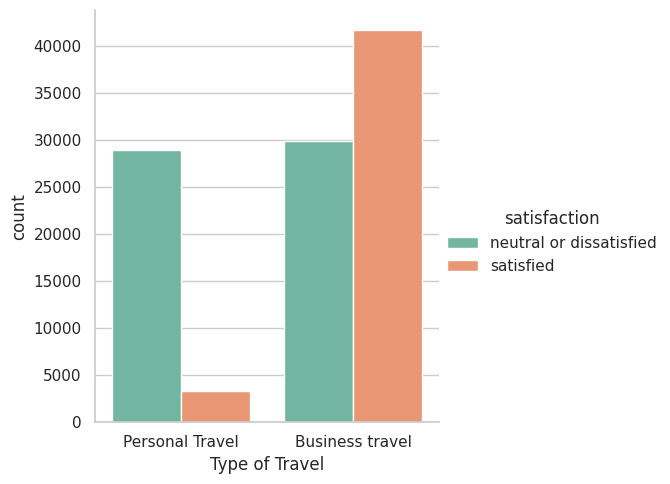

In [ ]:
# Seyahat türüne göre memuniyet durumuna bakalım.

sns.catplot(x="Type of Travel", kind="count", hue="satisfaction", data=airline_passenger, palette="Set2")

# Bu tabloya göre kişisel yolculuk yapanlar memnun değilken, iş için yolculuk yapanlar biraz daha memnun.

/tmp/ipython-input-75-777546783.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  a=sns.kdeplot(airline_passenger["Age"],shade=True)


Text(0.5, 1.0, 'Age Density Distribıtion')

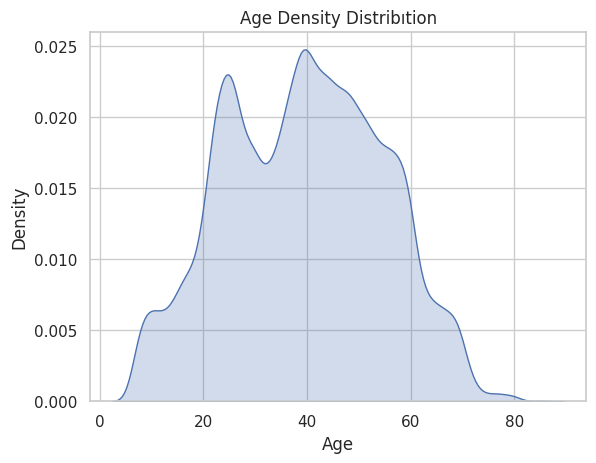

In [ ]:
# Yaş dağılımını görselleştirelim.

a=sns.kdeplot(airline_passenger["Age"],shade=True)
a.set_title("Age Density Distribıtion")

#Yaş sağılımı dengeli.

<Figure size 1000x50000 with 0 Axes>

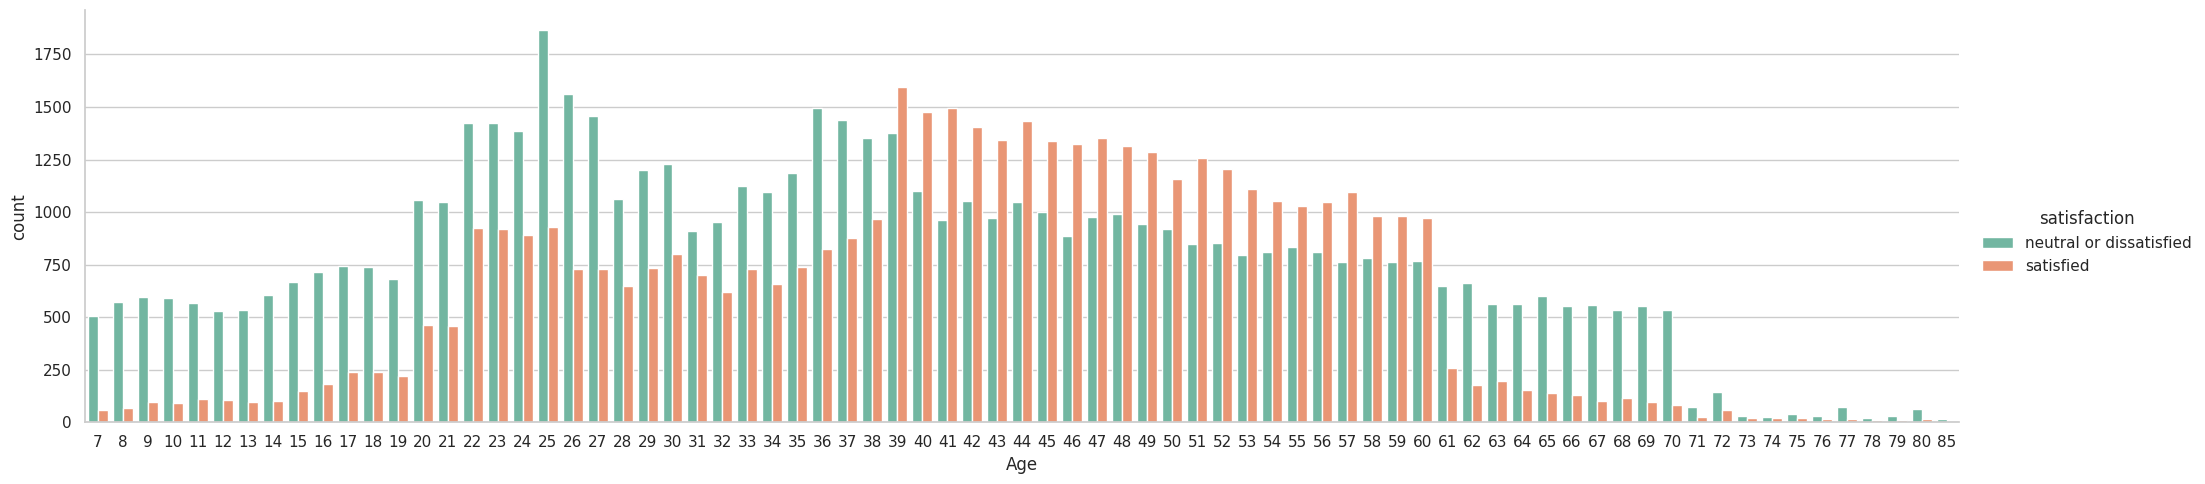

In [ ]:
# Yaşa göre memnuniyet dağılımına bakalım.

plt.figure(figsize=(10,500))
sns.catplot(x="Age", kind="count", hue="satisfaction", data=airline_passenger, palette="Set2", aspect=4)

# Yaşları 39-61 arasında olanlar daha memnunken, 21-39 arasında olanlar memnun değil.

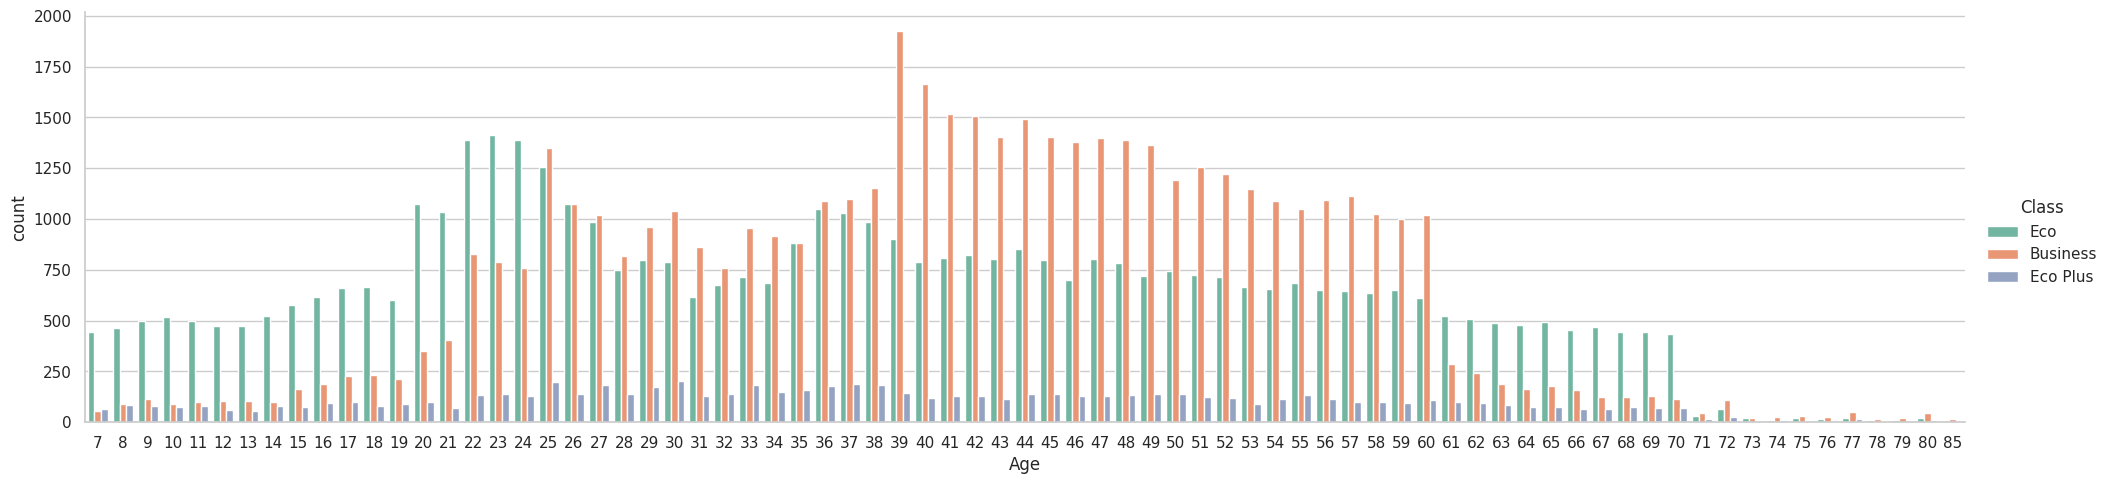

In [ ]:
# Sınıf ve uçuş arasındaki bağlantıya bakarak memnuniyetin yaşa göre mi, sınıfa mı göre mi değiştiğini tespit etmeye çalışalım.

sns.catplot(x="Age", kind="count", hue="Class", data=airline_passenger, palette="Set2",aspect=4)

# Yaşları 39-61 arasında olanlar aynı zamanda çoğunlukla Bussiness Class oldukları için daha memnun olabilirler.

/tmp/ipython-input-71-2039718089.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airline_passenger["Flight Distance"], shade=True)


<Axes: xlabel='Flight Distance', ylabel='Density'>

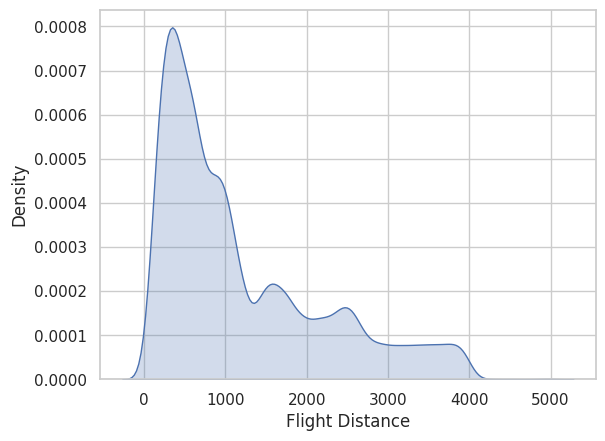

In [ ]:
# Uçuş mesafeslerinin dağılımını görselleştirelim.

sns.kdeplot(airline_passenger["Flight Distance"], shade=True)

# Grafik sağdan çarpıktır. Grafiğin sağında adaha önce de tespit edildiği gibi aykırı değerler bulunmaktadır.

/tmp/ipython-input-72-3143559809.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airline_passenger["Departure Delay in Minutes"], shade=True)


<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

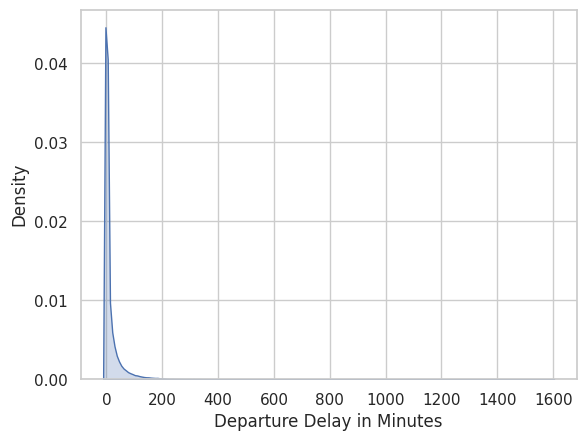

In [ ]:
# Kalkış süresinin gecikme dağılımına bakalım.

sns.kdeplot(airline_passenger["Departure Delay in Minutes"], shade=True)
# Grafik sağdan çarpıktır. Grafiğin sağında adaha önce de tespit edildiği gibi aykırı değerler bulunmaktadır.

/tmp/ipython-input-77-155222166.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airline_passenger["Arrival Delay in Minutes"],shade=True)


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

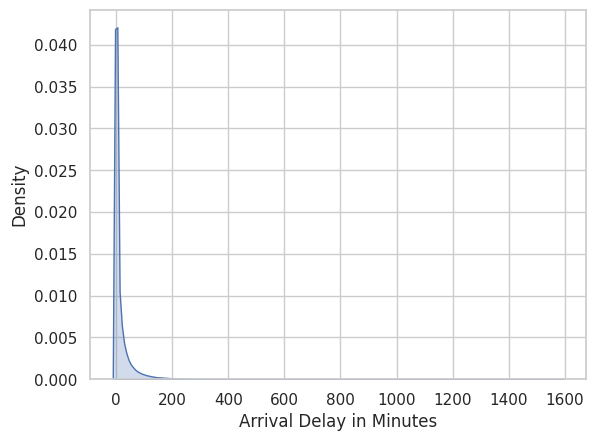

In [ ]:
# Varış süresinin gecikme dağılımına bakalım.

sns.kdeplot(airline_passenger["Arrival Delay in Minutes"],shade=True)

# Grafik sağdan çarpıktır. Grafiğin sağında adaha önce de tespit edildiği gibi aykırı değerler bulunmaktadır.

<Axes: xlabel='Flight Distance', ylabel='Departure Delay in Minutes'>

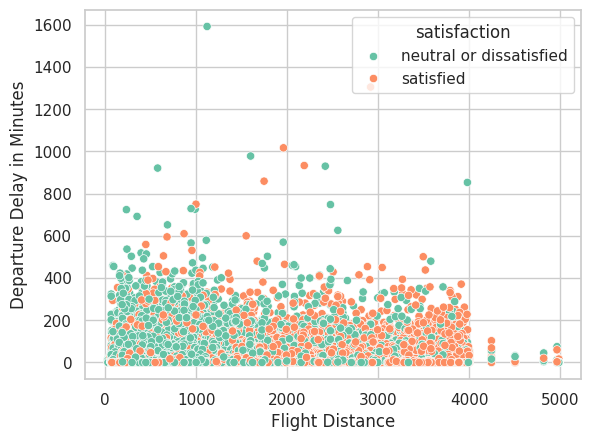

In [ ]:
# Uçuş mesafelerinin ve kalkış gecikmelerinin memnuniyete etkisine bakalım. Bunun için bir görselleştirme yapalım.

sns.scatterplot(x="Flight Distance", y="Departure Delay in Minutes", hue="satisfaction", data=airline_passenger, palette="Set2")

# Kısa mesafe uçuşlarında kalkış gecikmesi yaşandığında memnuniyetsizlik yaratmaktadır.
# Uzun mesafelerde yolcu memnuniyetinin arttığını, kısa mesafeli uçuşlarda memnuniyetin azaldığını söyleyebiliriz.
# kalkış süresi uzadıkça memnuniyet azalmaktadır.

<Axes: xlabel='Flight Distance', ylabel='Arrival Delay in Minutes'>

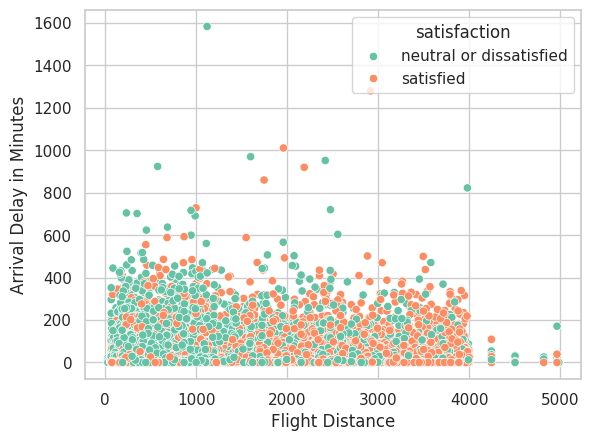

In [ ]:
# Uçuş mesafelerinin ve varış gecikmelerinin memnuniyete etkisine bakalım. Bunun için bir görselleştirme yapalım.

sns.scatterplot(x="Flight Distance", y="Arrival Delay in Minutes", hue="satisfaction", data=airline_passenger, palette="Set2")

# Kısa mesafe uçuşlarında varış gecikmesi yaşandığında memnuniyetsizlik yaratmaktadır.
# Uzun mesafelerde yolcu memnuniyetinin arttığını, kısa mesafeli uçuşlarda memnuniyetin azaldığını söyleyebiliriz.
# Varış süresi uzadıkça memnuniyet azalmaktadır.

In [ ]:
# Anket sonuçlarına göre hangi kategorinin ortalama değerinin ne kadar olduğu görebilmek için kategorilerin ortalama değerlerini içeren bir dataframe üretelim.

mean_airline_passenger=airline_passenger[["Inflight wifi service","Departure/Arrival time convenient",
                                                                 "Ease of Online booking","Gate location","Food and drink",
                                                                 "Online boarding","Seat comfort","Inflight entertainment",
                                                                 "On-board service","Leg room service","Baggage handling",
                                                                 "Checkin service","Inflight service","Cleanliness"]].mean().reset_index()

mean_airline_passenger

,index,0
0,Inflight wifi service,2.729683
1,Departure/Arrival time convenient,3.060296
2,Ease of Online booking,2.756901
3,Gate location,2.976883
4,Food and drink,3.202129
5,Online boarding,3.250375
6,Seat comfort,3.439396
7,Inflight entertainment,3.358158
8,On-board service,3.382363
9,Leg room service,3.351055


/tmp/ipython-input-128-1074992189.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_airline_passenger, x="Category", y="Number of Mean", palette="Blues_d")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Inflight wifi service'),
  Text(1, 0, 'Departure/Arrival time convenient'),
  Text(2, 0, 'Ease of Online booking'),
  Text(3, 0, 'Gate location'),
  Text(4, 0, 'Food and drink'),
  Text(5, 0, 'Online boarding'),
  Text(6, 0, 'Seat comfort'),
  Text(7, 0, 'Inflight entertainment'),
  Text(8, 0, 'On-board service'),
  Text(9, 0, 'Leg room service'),
  Text(10, 0, 'Baggage handling'),
  Text(11, 0, 'Checkin service'),
  Text(12, 0, 'Inflight service'),
  Text(13, 0, 'Cleanliness')])

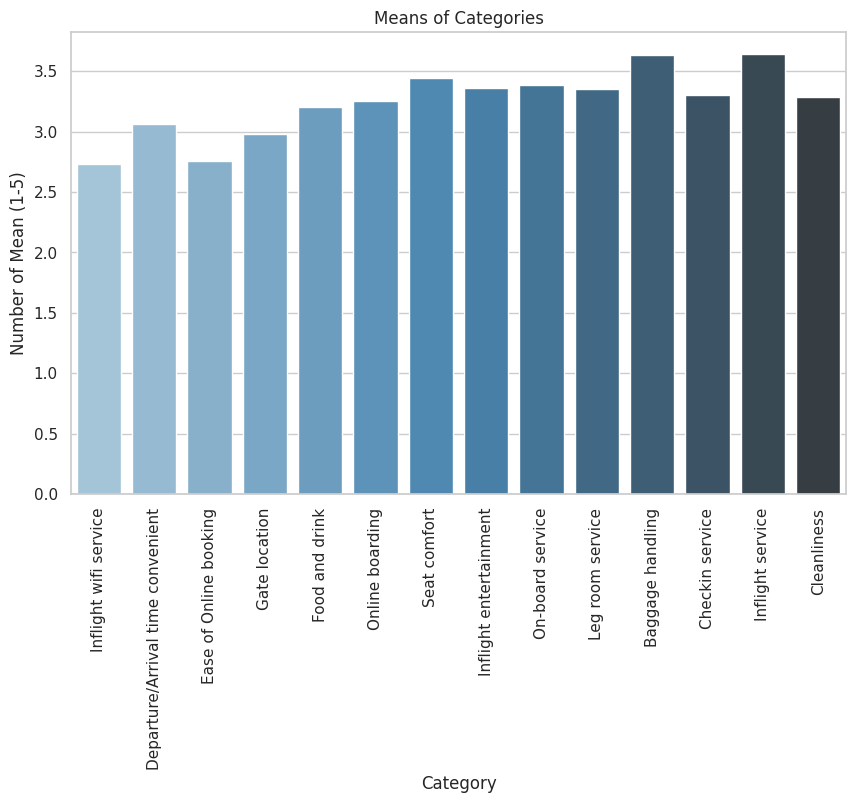

In [128]:
# Anket sonuçlarına göre hangi kategorinin ortalama değeri ne kadarmış görselleştirelim.

mean_airline_passenger.columns = ["Category", "Number of Mean"]  #Üretilen dataframe'e kolon isimleri atayalım.

plt.figure(figsize=(10,6)) #Boyutu belirlemek için
sns.barplot(data=mean_airline_passenger, x="Category", y="Number of Mean", palette="Blues_d")

plt.title("Means of Categories") #Başlık
plt.ylabel("Number of Mean (1-5)")  #y ekseni ismi için
plt.xlabel("Category")  #x ekseni ismi için
plt.xticks(rotation=90) #Kategori isimleri (x eksenindekiler) uzun olduğundan 90 derece döndürmek için

#Sonuçlara göre uçak içi wifi hizmeti ve çevrimiçi rezervasyon kolaylığı kategorilerinin en düşük puanları,
#           bagaj işlemleri ve uçak içi hizmet kategorilerinin en yüksek puanları aldığı tespit edilmiştir.

<Axes: xlabel='Flight Distance'>

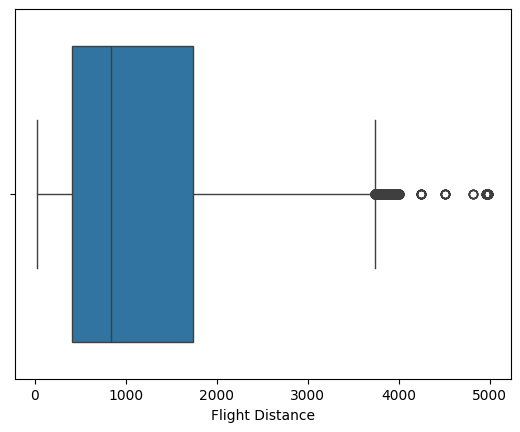

In [ ]:
sns.boxplot(x="Flight Distance", data=airline_passenger)

/tmp/ipython-input-106-4109348815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Flight Distance", y="satisfaction", data=airline_passenger, palette="Set2")


<Axes: xlabel='Flight Distance', ylabel='satisfaction'>

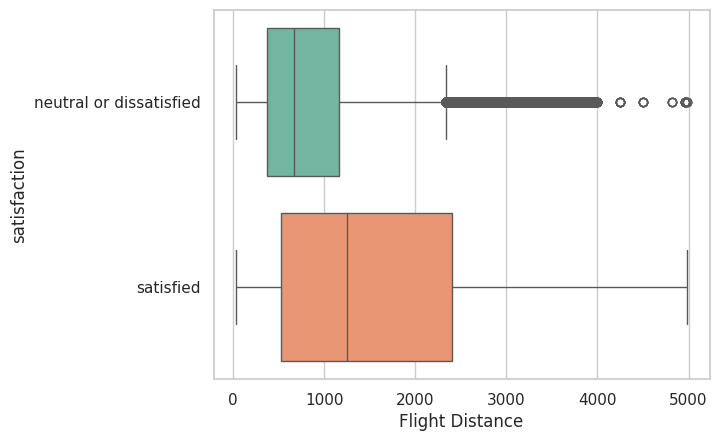

In [106]:
# Aykırı değerlerin memnuniyeti etkileyip etkilemediğine bakalım.
# 1. Uçuş mesafesi

sns.boxplot(x="Flight Distance", y="satisfaction", data=airline_passenger, palette="Set2")

# Uçuş mesafesindeki aykırı değerler memnuniyetsizlik yaratmış.

/tmp/ipython-input-105-2765589057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Departure Delay in Minutes", y="satisfaction", data=airline_passenger,palette="Set2")


<Axes: xlabel='Departure Delay in Minutes', ylabel='satisfaction'>

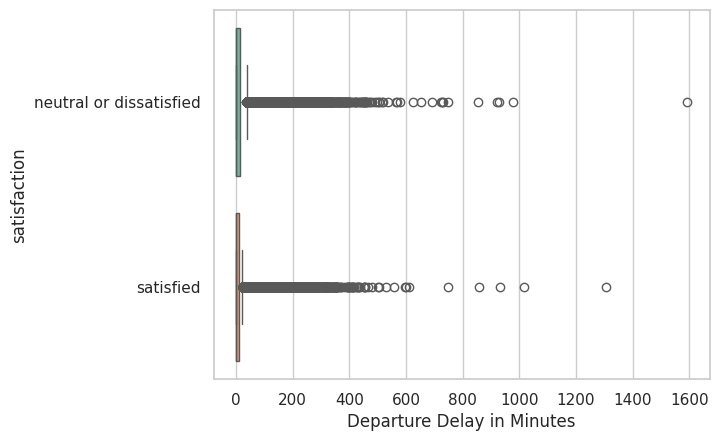

In [105]:
# Aykırı değerlerin memnuniyeti etkileyip etkilemediğine bakalım.
# 2. Kalkış gecikmesi

sns.boxplot(x="Departure Delay in Minutes", y="satisfaction", data=airline_passenger,palette="Set2")

# Kalkış gecikmesi memnuniyet dağılımını etkilememiştir.

/tmp/ipython-input-107-1766385614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Arrival Delay in Minutes", y="satisfaction", data=airline_passenger,palette="Set2")


<Axes: xlabel='Arrival Delay in Minutes', ylabel='satisfaction'>

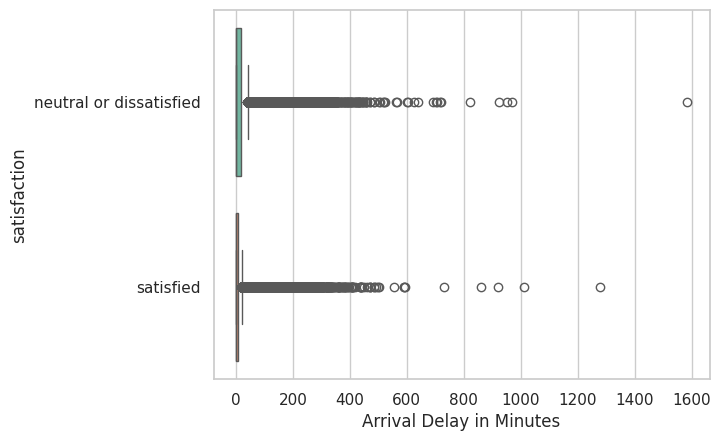

In [107]:
# Aykırı değerlerin memnuniyeti etkileyip etkilemediğine bakalım.
# 3. Varış gecikmesi

sns.boxplot(x="Arrival Delay in Minutes", y="satisfaction", data=airline_passenger,palette="Set2")

# Varış gecikmesi memnuniyet dağılımını etkilememiştir.

In [126]:
#Sınıfa göre hangi kategorilerde memnuniyet ortalamasının nasıl değiştiğine tablo ile bakalım, ardından fark görülen değeri/değerleri görselleştirelim.

mean_airline_passenger_class=airline_passenger.groupby(["Class"], as_index=False).agg({"Inflight wifi service":"mean","Departure/Arrival time convenient":"mean",
                                                                 "Ease of Online booking":"mean","Gate location":"mean","Food and drink":"mean",
                                                                 "Online boarding":"mean","Seat comfort":"mean","Inflight entertainment":"mean",
                                                                 "On-board service":"mean","Leg room service":"mean","Baggage handling":"mean",
                                                                 "Checkin service":"mean","Inflight service":"mean","Cleanliness":"mean"})
mean_airline_passenger_class

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Business,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600
1,Eco,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097
2,Eco Plus,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771


/tmp/ipython-input-127-318256756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Class", y="Online boarding", data=mean_of_online_boarding, kind="bar", palette="Set2") #Oluşturulan dataframe için görselleştirme yapıldı.


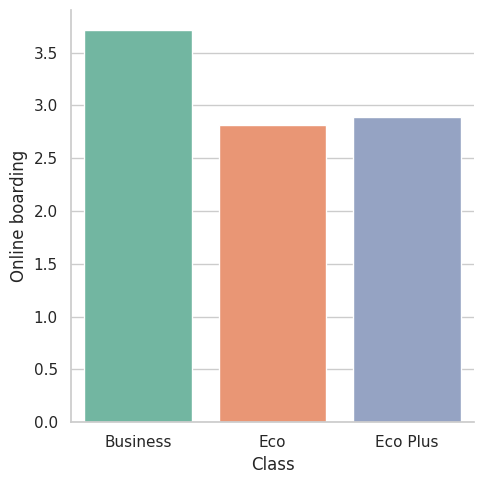

In [127]:
# Kategori puanlamalarında en büyük fark Online boarding kategorisinde olduğunda bu kategori için memnuniyet durumunu görselleştirelim.

mean_of_online_boarding=airline_passenger.groupby("Class", as_index=False)["Online boarding"].mean() #Class grubu için online boarding ortalamaları için dataframe oluşturuldu.

sns.catplot(x="Class", y="Online boarding", data=mean_of_online_boarding, kind="bar", palette="Set2") #Oluşturulan dataframe için görselleştirme yapıldı.

#Business Class yolcularının, Eco yolcularına göre çerimiçi binişten daha memnun olduğu görüntülendi.

In [ ]:
# Teşekkürler...